In [ ]:
!pip install adjustText

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

# Data Pre-processing, Cleaning, and Normalization

In [ ]:
data = pd.read_excel('/content/2021-22_relevant_data_per90_big5.xlsx')
data.Pos.unique() # DF, MF, FW, GK - need to remove goalkeepers (GK)
print(data.head())

   Rk                      Player Nation Pos          Squad  \
0   1         Max Aarons\774cf58b    ENG  DF   Norwich City   
1   2   Yunis Abdelhamid\32c2d95f    MAR  DF          Reims   
2   3  Salis Abdul Samed\82464ce3    GHA  MF  Clermont Foot   
3   4    Laurent Abergel\31626657    FRA  MF        Lorient   
4   5        Charles Abi\469d3d84    FRA  FW  Saint-Étienne   

                 Comp   Age   90s   Assists  Non-Penalty Goals  ...  \
0  eng Premier League  21.0  32.0  0.062500           0.000000  ...   
1          fr Ligue 1  33.0  33.1  0.000000           0.060423  ...   
2          fr Ligue 1  21.0  27.4  0.000000           0.036496  ...   
3          fr Ligue 1  28.0  32.8  0.060976           0.000000  ...   
4          fr Ligue 1  21.0   0.5  0.000000           0.000000  ...   

   Clearances  Touches Def Pen  Touches Def 3rd  Touches Mid 3rd  \
0    2.187500         5.062500        23.343750        23.843750   
1    3.202417         8.277946        32.779456        25.

In [ ]:
data_nogk = data[~(data['Pos'] == 'GK')]
data_nogk.Pos.unique() # now only left with DF, MF, FW
data_nogk.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,90s,Assists,Non-Penalty Goals,...,Clearances,Touches Def Pen,Touches Def 3rd,Touches Mid 3rd,Touches Att 3rd,Touches Att Pen,Dribbles Attempted,Dribbles Num Players,Passes Succ Received,Prog Passes Succ Received
0,1,Max Aarons\774cf58b,ENG,DF,Norwich City,eng Premier League,21.0,32.0,0.062500,0.000000,...,2.187500,5.062500,23.343750,23.843750,15.031250,0.906250,2.437500,1.093750,32.406250,1.281250
1,2,Yunis Abdelhamid\32c2d95f,MAR,DF,Reims,fr Ligue 1,33.0,33.1,0.000000,0.060423,...,3.202417,8.277946,32.779456,25.740181,2.900302,0.845921,0.664653,0.483384,36.314199,0.362538
2,3,Salis Abdul Samed\82464ce3,GHA,MF,Clermont Foot,fr Ligue 1,21.0,27.4,0.000000,0.036496,...,0.547445,2.007299,22.664234,41.751825,10.912409,0.620438,1.532847,1.094891,54.160584,1.715328
3,4,Laurent Abergel\31626657,FRA,MF,Lorient,fr Ligue 1,28.0,32.8,0.060976,0.000000,...,0.335366,0.670732,13.658537,40.335366,11.554878,0.457317,1.981707,1.341463,43.048780,1.859756
4,5,Charles Abi\469d3d84,FRA,FW,Saint-Étienne,fr Ligue 1,21.0,0.5,0.000000,0.000000,...,0.000000,0.000000,0.000000,10.000000,18.000000,6.000000,0.000000,0.000000,16.000000,4.000000


In [ ]:
# encode positions - 0 = 'DF'; 1 = 'FW'; 2 = 'MF'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_nogk['Pos']=le.fit_transform(data_nogk['Pos'])
data_nogk.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Rk,Player,Nation,Pos,Squad,Comp,Age,90s,Assists,Non-Penalty Goals,...,Clearances,Touches Def Pen,Touches Def 3rd,Touches Mid 3rd,Touches Att 3rd,Touches Att Pen,Dribbles Attempted,Dribbles Num Players,Passes Succ Received,Prog Passes Succ Received
0,1,Max Aarons\774cf58b,ENG,0,Norwich City,eng Premier League,21.0,32.0,0.062500,0.000000,...,2.187500,5.062500,23.343750,23.843750,15.031250,0.906250,2.437500,1.093750,32.406250,1.281250
1,2,Yunis Abdelhamid\32c2d95f,MAR,0,Reims,fr Ligue 1,33.0,33.1,0.000000,0.060423,...,3.202417,8.277946,32.779456,25.740181,2.900302,0.845921,0.664653,0.483384,36.314199,0.362538
2,3,Salis Abdul Samed\82464ce3,GHA,2,Clermont Foot,fr Ligue 1,21.0,27.4,0.000000,0.036496,...,0.547445,2.007299,22.664234,41.751825,10.912409,0.620438,1.532847,1.094891,54.160584,1.715328
3,4,Laurent Abergel\31626657,FRA,2,Lorient,fr Ligue 1,28.0,32.8,0.060976,0.000000,...,0.335366,0.670732,13.658537,40.335366,11.554878,0.457317,1.981707,1.341463,43.048780,1.859756
4,5,Charles Abi\469d3d84,FRA,1,Saint-Étienne,fr Ligue 1,21.0,0.5,0.000000,0.000000,...,0.000000,0.000000,0.000000,10.000000,18.000000,6.000000,0.000000,0.000000,16.000000,4.000000


In [ ]:
# avoid small sample size for per90 stats- keep only players that played at least 4 x 90s (360 mins)
data_clnd = data_nogk[data_nogk['90s'] >= 4.0] 
data_clnd.index = range(len(data_clnd))
data_clnd.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,90s,Assists,Non-Penalty Goals,...,Clearances,Touches Def Pen,Touches Def 3rd,Touches Mid 3rd,Touches Att 3rd,Touches Att Pen,Dribbles Attempted,Dribbles Num Players,Passes Succ Received,Prog Passes Succ Received
0,1,Max Aarons\774cf58b,ENG,0,Norwich City,eng Premier League,21.0,32.0,0.062500,0.000000,...,2.187500,5.062500,23.343750,23.843750,15.031250,0.906250,2.437500,1.093750,32.406250,1.281250
1,2,Yunis Abdelhamid\32c2d95f,MAR,0,Reims,fr Ligue 1,33.0,33.1,0.000000,0.060423,...,3.202417,8.277946,32.779456,25.740181,2.900302,0.845921,0.664653,0.483384,36.314199,0.362538
2,3,Salis Abdul Samed\82464ce3,GHA,2,Clermont Foot,fr Ligue 1,21.0,27.4,0.000000,0.036496,...,0.547445,2.007299,22.664234,41.751825,10.912409,0.620438,1.532847,1.094891,54.160584,1.715328
3,4,Laurent Abergel\31626657,FRA,2,Lorient,fr Ligue 1,28.0,32.8,0.060976,0.000000,...,0.335366,0.670732,13.658537,40.335366,11.554878,0.457317,1.981707,1.341463,43.048780,1.859756
4,6,Dickson Abiama\cadd666a,NGA,1,Greuther Fürth,de Bundesliga,22.0,8.1,0.123457,0.000000,...,0.864198,1.111111,3.456790,15.555556,15.555556,3.827160,2.222222,0.864198,21.111111,5.925926


Our classes are unbalanced! we'll just randomly take the min number of each class 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


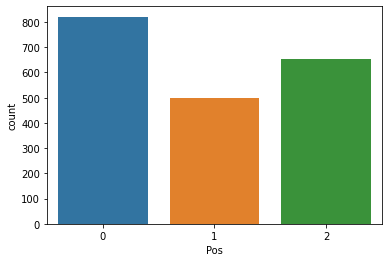

In [ ]:
# our positions are unbalanced! 
sns.countplot(data_clnd.Pos)

In [ ]:
defenders = data_clnd[data_clnd['Pos'] == 0]
forwards = data_clnd[data_clnd['Pos'] == 1]
midfielders = data_clnd[data_clnd['Pos'] == 2]
samples_per_class = min(len(defenders), len(forwards), len(midfielders))
defenders = defenders.sample(samples_per_class)
forwards = forwards.sample(samples_per_class)
midfielders = midfielders.sample(samples_per_class)

In [ ]:
selected_players = pd.concat([defenders, midfielders, forwards])
selected_players = selected_players.reset_index()
selected_players

,index,Rk,Player,Nation,Pos,Squad,Comp,Age,90s,Assists,...,Clearances,Touches Def Pen,Touches Def 3rd,Touches Mid 3rd,Touches Att 3rd,Touches Att Pen,Dribbles Attempted,Dribbles Num Players,Passes Succ Received,Prog Passes Succ Received
0,613,935,Marvin Friedrich\b77f44a4,GER,0,M'Gladbach,de Bundesliga,25.0,6.7,0.000000,...,4.029851,8.805970,48.955224,33.582090,2.537313,1.343284,0.149254,0.000000,58.955224,0.447761
1,1417,2085,Mathias Pereira Lage\8846a40f,POR,0,Angers,fr Ligue 1,24.0,11.6,0.172414,...,2.413793,2.931034,14.568966,30.000000,18.793103,1.982759,1.896552,1.206897,32.413793,3.879310
2,35,51,Jordi Alba\4601e194,ESP,0,Barcelona,es La Liga,32.0,29.4,0.340136,...,1.292517,3.163265,24.387755,50.680272,32.108844,2.789116,0.748299,0.272109,73.299320,3.775510
3,1398,2059,Benjamin Pavard\45a03961,FRA,0,Bayern Munich,de Bundesliga,25.0,23.1,0.043290,...,2.424242,6.103896,31.688312,55.887446,17.316017,1.428571,0.346320,0.173160,71.818182,1.731602
4,1403,2064,Alfonso Pedraza\63f04c6c,ESP,0,Villarreal,es La Liga,25.0,18.9,0.211640,...,1.957672,3.333333,17.460317,26.984127,26.666667,4.338624,2.962963,1.640212,39.894180,4.814815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,534,811,Anthony Elanga\2fba6108,SWE,1,Manchester Utd,eng Premier League,19.0,13.5,0.148148,...,0.444444,0.888889,9.185185,17.185185,22.814815,4.740741,2.888889,1.333333,33.259259,6.370370
1490,954,1413,Ibrahima Koné\04bb2b06,MLI,1,Lorient,fr Ligue 1,22.0,8.1,0.123457,...,0.370370,0.987654,2.098765,13.703704,14.197531,4.074074,0.864198,0.370370,20.740741,6.790123
1491,629,960,Kévin Gameiro\42276181,FRA,1,Strasbourg,fr Ligue 1,34.0,26.5,0.113208,...,0.037736,0.150943,2.188679,17.924528,22.754717,6.339623,1.396226,0.716981,31.018868,9.320755
1492,1778,2653,Alexis Tibidi\ca6f4846,FRA,1,Stuttgart,de Bundesliga,17.0,4.3,0.000000,...,0.697674,0.930233,5.813953,18.604651,19.069767,3.488372,1.162791,0.930233,29.302326,6.744186


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


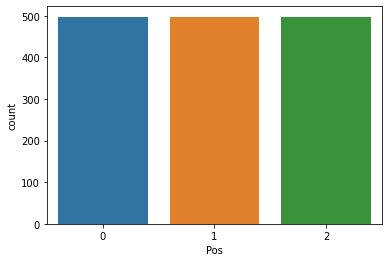

In [ ]:
# our labels are balanced now! 
sns.countplot(selected_players.Pos)

In [ ]:
# double check that we aren't missing any data
print(selected_players.isnull().values.any())

False


In [ ]:
features = selected_players.drop(columns=['Rk', 'Player', 'Nation',	'Pos', 'Squad',	'Comp',	'Age',	'90s'])
features.head()

,index,Assists,Non-Penalty Goals,Non-Penalty Expected Goals,Expected Assists,Shots,Short Pass Att,Medium Pass Att,Long Pass Att,Passes Creating Shots,...,Clearances,Touches Def Pen,Touches Def 3rd,Touches Mid 3rd,Touches Att 3rd,Touches Att Pen,Dribbles Attempted,Dribbles Num Players,Passes Succ Received,Prog Passes Succ Received
0,613,0.000000,0.000000,0.044776,0.000000,0.746269,18.507463,36.417910,14.328358,0.000000,...,4.029851,8.805970,48.955224,33.582090,2.537313,1.343284,0.149254,0.000000,58.955224,0.447761
1,1417,0.172414,0.344828,0.232759,0.129310,1.724138,19.568966,18.965517,4.655172,0.775862,...,2.413793,2.931034,14.568966,30.000000,18.793103,1.982759,1.896552,1.206897,32.413793,3.879310
2,35,0.340136,0.068027,0.044218,0.200680,1.054422,40.068027,39.183673,11.938776,1.972789,...,1.292517,3.163265,24.387755,50.680272,32.108844,2.789116,0.748299,0.272109,73.299320,3.775510
3,1398,0.043290,0.000000,0.043290,0.073593,0.822511,34.112554,42.164502,12.121212,0.779221,...,2.424242,6.103896,31.688312,55.887446,17.316017,1.428571,0.346320,0.173160,71.818182,1.731602
4,1403,0.211640,0.211640,0.084656,0.169312,1.216931,22.804233,19.206349,7.619048,1.164021,...,1.957672,3.333333,17.460317,26.984127,26.666667,4.338624,2.962963,1.640212,39.894180,4.814815


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(features)
scaled_features = pd.DataFrame(scaler.transform(features), columns=features.columns, index=selected_players.index)
scaled_features.head()

,index,Assists,Non-Penalty Goals,Non-Penalty Expected Goals,Expected Assists,Shots,Short Pass Att,Medium Pass Att,Long Pass Att,Passes Creating Shots,...,Clearances,Touches Def Pen,Touches Def 3rd,Touches Mid 3rd,Touches Att 3rd,Touches Att Pen,Dribbles Attempted,Dribbles Num Players,Passes Succ Received,Prog Passes Succ Received
0,-0.656215,-0.889948,-0.852806,-0.737527,-1.228283,-0.693533,0.252774,2.433883,1.706006,-1.458058,...,1.663179,1.890637,3.197420,0.647081,-1.599319,-0.658791,-1.188024,-1.283421,1.974378,-1.118187
1,0.755000,0.620371,1.228478,0.603466,0.369548,0.323158,0.426621,0.300845,-0.550555,-0.273935,...,0.551384,-0.037638,0.016755,0.288742,0.305255,-0.347450,0.109988,0.232101,-0.298508,0.046083
2,-1.670746,2.089592,-0.442213,-0.741511,1.251435,-0.373146,3.783857,2.771915,1.148564,1.552819,...,-0.220018,0.038585,0.924975,2.357524,1.865364,0.045142,-0.743012,-0.941729,3.202741,0.010865
3,0.721651,-0.510734,-0.852806,-0.748128,-0.318926,-0.614264,2.808499,3.136233,1.191123,-0.268809,...,0.558572,1.003761,1.600263,2.878432,0.132195,-0.617267,-1.041630,-1.065980,3.075903,-0.682601
4,0.730427,0.963988,0.424596,-0.453039,0.863833,-0.204185,0.956478,0.330280,0.140858,0.318475,...,0.237587,0.094405,0.284200,-0.012956,1.227743,0.799551,0.902191,0.776222,0.342078,0.363485


# Visualizing the Data + Feature Selection

500

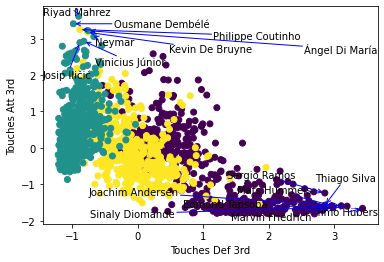

In [ ]:
# visualize some features
xstr = 'Touches Def 3rd'
ystr = 'Touches Att 3rd'

plt.scatter(scaled_features[xstr], scaled_features[ystr], c=selected_players.Pos, label=selected_players.Pos)
plt.xlabel(xstr)
plt.ylabel(ystr)
texts = []
x_995p = scaled_features[xstr].quantile(0.995)
y_995p = scaled_features[ystr].quantile(0.995)

for i in selected_players.index:
  name = selected_players['Player'][i].split('\\')[0]
  x = scaled_features[xstr][i]
  y = scaled_features[ystr][i]
  if x > x_995p or y > y_995p:
    texts += [plt.text(x, y, name, ha='center', va='center')]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='blue'))


Now let's try combining a few features that are relatively distinctive for each position of player.

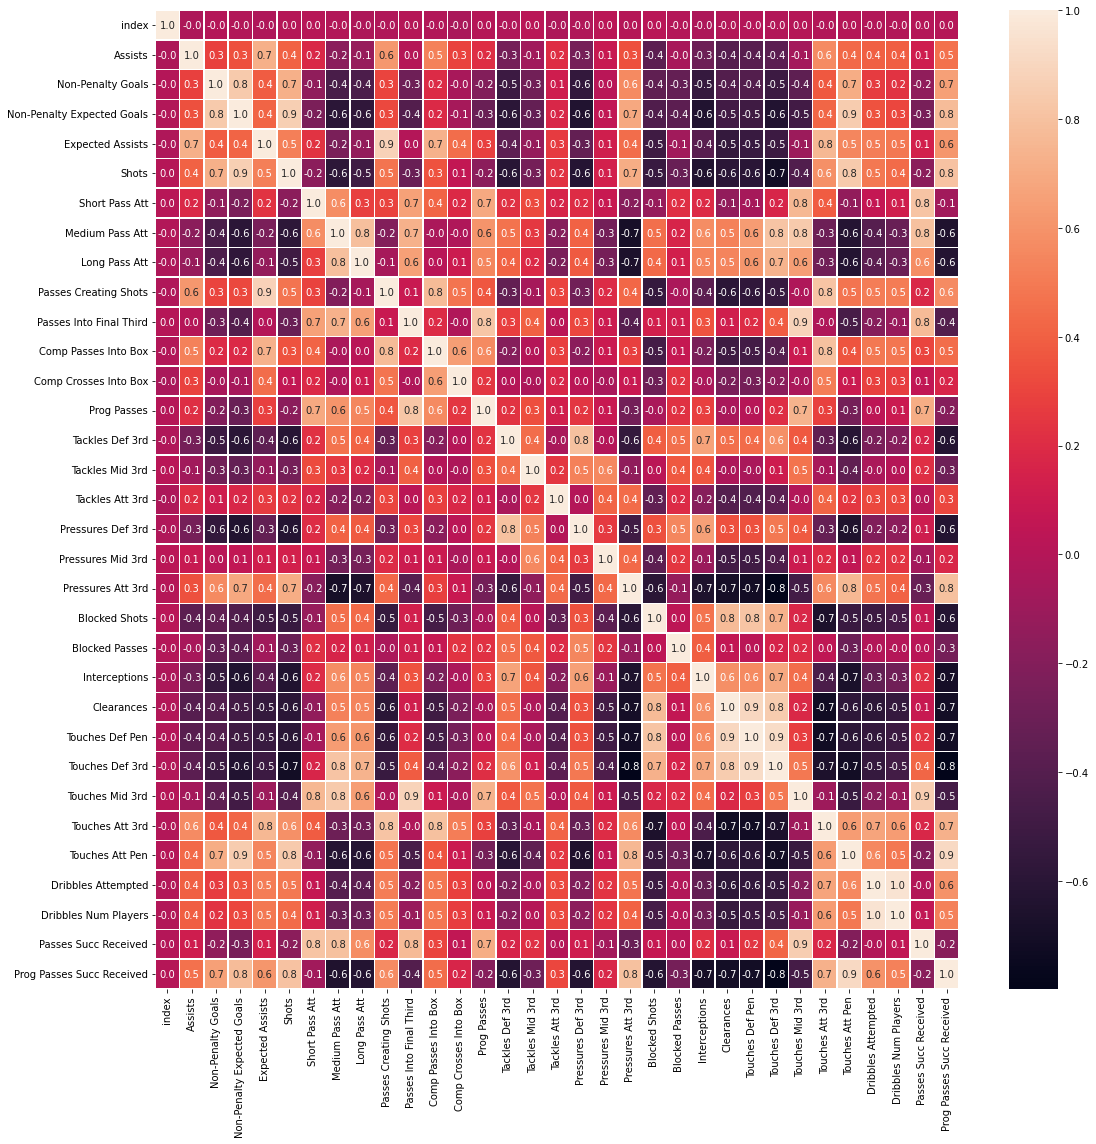

In [ ]:
# but first, we'll view the correlation between all features
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(features.corr(),annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Even in the correlation data above, we can see some patterns in the data because the database somewhat already organized the features - for example, a lot of the attacking features were grouped together in the database (i.e. listed consecutively in the columns), and the same applies for a lot of the defensive features. 

We can see some large areas of high negative correlation where these attacking features meet the defensive features!

In [ ]:
# combine a few attacking, midfield, defensive features that seem to provide good information above
att_features = ['Non-Penalty Expected Goals', 'Shots', 'Pressures Att 3rd', 'Touches Att 3rd', 'Touches Att Pen', 'Prog Passes Succ Received']
mid_features = ['Short Pass Att', 'Passes Into Final Third', 'Prog Passes', 'Pressures Mid 3rd', 'Touches Mid 3rd', 'Passes Succ Received']
def_features = ['Tackles Def 3rd', 'Pressures Def 3rd', 'Blocked Shots', 'Clearances', 'Touches Def Pen', 'Touches Def 3rd']
select_feature_names = att_features + mid_features + def_features

In [ ]:
select_features = scaled_features[select_feature_names]
select_features = pd.DataFrame(select_features, index=selected_players.index)
select_features.head()

,Non-Penalty Expected Goals,Shots,Pressures Att 3rd,Touches Att 3rd,Touches Att Pen,Prog Passes Succ Received,Short Pass Att,Passes Into Final Third,Prog Passes,Pressures Mid 3rd,Touches Mid 3rd,Passes Succ Received,Tackles Def 3rd,Pressures Def 3rd,Blocked Shots,Clearances,Touches Def Pen,Touches Def 3rd
0,-0.737527,-0.693533,-1.293358,-1.599319,-0.658791,-1.118187,0.252774,-0.434982,-0.399226,-1.572714,0.647081,1.974378,2.427881,0.068558,0.458947,1.663179,1.890637,3.197420
1,0.603466,0.323158,-0.263824,0.305255,-0.347450,0.046083,0.426621,-0.314658,0.134655,0.777712,0.288742,-0.298508,0.142124,2.109971,1.236630,0.551384,-0.037638,0.016755
2,-0.741511,-0.373146,-0.718565,1.865364,0.045142,0.010865,3.783857,3.372249,3.764349,-0.616902,2.357524,3.202741,-0.703116,-0.473529,-0.215125,-0.220018,0.038585,0.924975
3,-0.748128,-0.614264,-0.839817,0.132195,-0.617267,-0.682601,2.808499,3.195645,2.363929,-0.921783,2.878432,3.075903,0.310299,-0.214073,1.385405,0.558572,1.003761,1.600263
4,-0.453039,-0.204185,-0.273975,1.227743,0.799551,0.363485,0.956478,-0.064742,0.195109,-0.421715,-0.012956,0.342078,0.507351,0.107576,-0.470282,0.237587,0.094405,0.284200


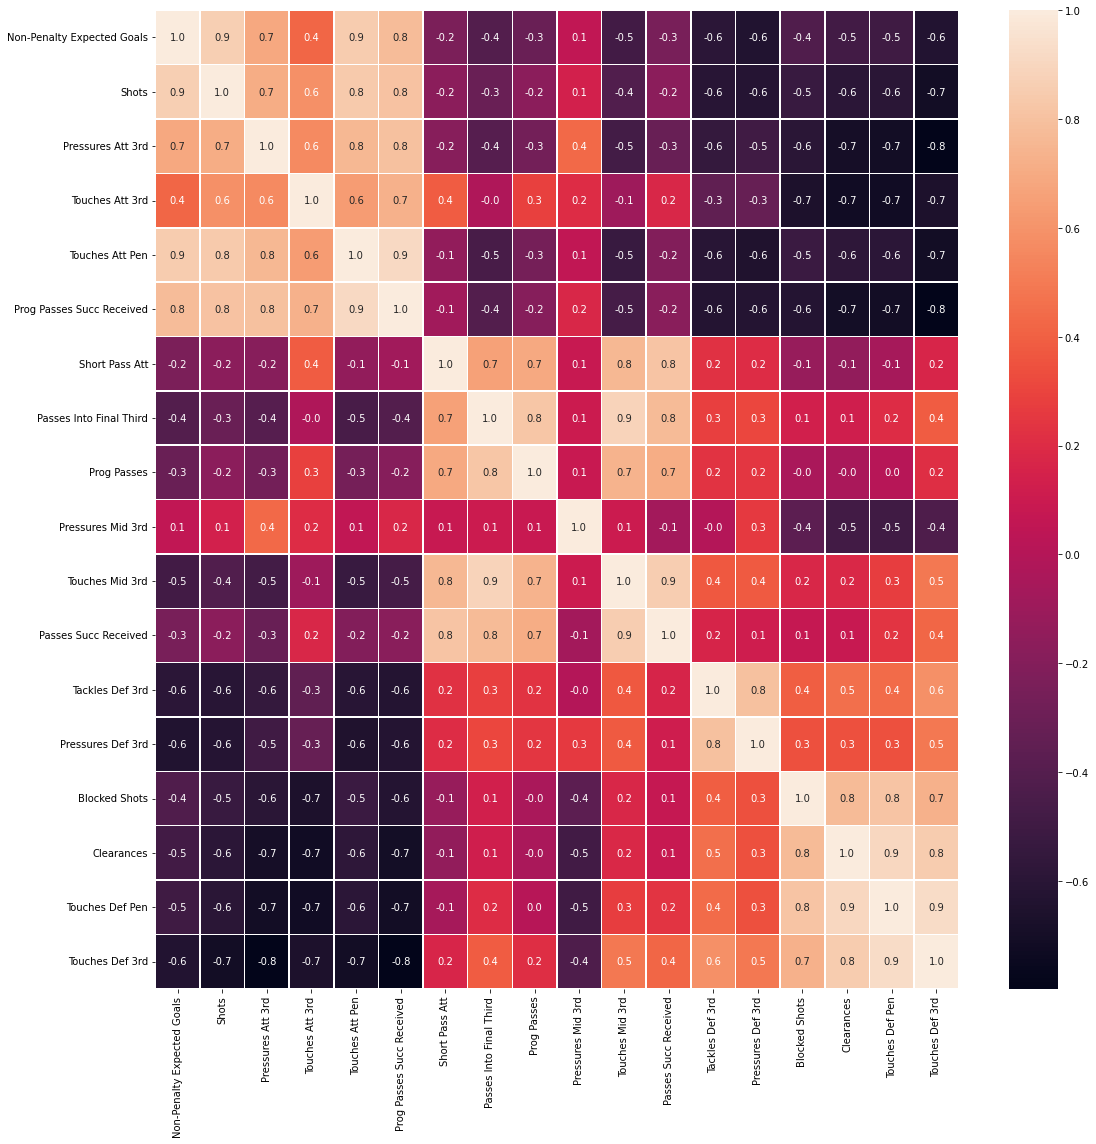

In [ ]:
# now let's focus on those selected features only
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(select_features.corr(),annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# Problem Statement:

The problem I am trying to solve is classification. I am trying to classify players by position (column 'Pos' in the dataset), using a subset of the features included in the dataset. My evaluation metric will be F1 score.

* Note: all features are already adjusted to be weighted by minutes played. So, each value (before normalization) was actually the number of occurrences of an action by a player *per 90 minutes played*.

The features I am using are:

Non-Penalty Expected Goals - a sum of the % chance of a goal from each shot a player takes, excluding any penalty kicks they take

Shots - shots taken by a player

Pressures Att 3rd - number of times a player pressured an opponent in the 1/3rd 
of the field closest to the opposition goal

Touches Att 3rd - number of times a player touched the ball in the 1/3rd of 
the field closest to the opposition goal 

Touches Att Pen - number of times a player touched the ball in the opposition's penalty box

Prog Passes Succ Received - progressive passes successfully received

Short Pass Att - short passes attempted

Passes Into Final Third - passes that enter the 1/3rd of the field closest to the opponent's goal

Prog Passes - passes that move the ball forward

Pressures Mid 3rd - number of times a player pressured an opponent in the 
middle 1/3rd of the field 

Touches Mid 3rd - number of times a player touched the ball in the middle 1/3rd of the field 

Passes Succ Received - passes successfully received

Tackles Def 3rd - number of times a player tackled an opponent in the 1/3rd 
of the field closest to their own goal

Pressures Def 3rd - number of times a player pressured an opponent in the 1/3rd 
of the field closest to their own goal

Blocked Shots - number of shots a player blocked

Clearances - number of times a player kicked the ball away from their own goal

Touches Def Pen - number of times a player touched the ball in their own penalty box

Touches Def 3rd - number of times a player touched the ball in the 1/3rd of 
the field closest to their own goal 

# Supervised Learning

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, plot_confusion_matrix

In [ ]:
from sklearn.model_selection import train_test_split
labels = selected_players.Pos
x_train, x_test, y_train, y_test = train_test_split(scaled_features, labels, test_size=0.2)

### Linear SVC (from the Scikit-learn chart)
using selected features only

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
linearsvc = LinearSVC()
linearsvc.fit(x_train, y_train)
svc_predicted = linearsvc.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
print('Accuracy: ', accuracy_score(y_test, svc_predicted))
print('Precision: ', precision_score(y_test, svc_predicted, average='macro'))
print('Recall: ', recall_score(y_test, svc_predicted, average='macro'))
print('F1 Score: ', f1_score(y_test, svc_predicted, average='macro'))

Accuracy:  0.939799331103679
Precision:  0.9384381091617934
Recall:  0.9388906632598744
F1 Score:  0.9382378929662631


Results are super good with LinearSVC, about 94% for the F1 score!

**Reminder:**

Class 0 = Defender

Class 1 = Forward

Class 2 = Midfielder

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


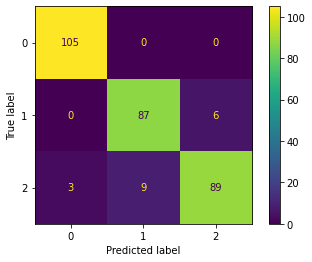

In [ ]:
plot_confusion_matrix(linearsvc, x_test, y_test)

In [ ]:
svc_predicted = pd.Series(svc_predicted, index=y_test.index)

**Reminder:**

Class 0 = Defender

Class 1 = Forward

Class 2 = Midfielder

In [ ]:
# look at who was classified incorrectly
for i in y_test.index:
  if y_test[i] != svc_predicted[i]:
    name = selected_players['Player'][i].split('\\')[0]
    print(f"{name}: Actual={y_test[i]} | Prediction={svc_predicted[i]}" )

Renaud Ripart: Actual=1 | Prediction=2
Santiago Arzamendia: Actual=2 | Prediction=0
Mario Pašalić: Actual=2 | Prediction=1
Håvard Nielsen: Actual=2 | Prediction=1
Justin Kluivert: Actual=2 | Prediction=1
Louis Schaub: Actual=2 | Prediction=0
Thomas Müller: Actual=2 | Prediction=1
Marcus Coco: Actual=1 | Prediction=2
Mattia Aramu: Actual=2 | Prediction=1
Darwin Machís: Actual=2 | Prediction=1
Patrick Wimmer: Actual=1 | Prediction=2
Miguel Almirón: Actual=2 | Prediction=1
Michael Olise: Actual=1 | Prediction=2
Stuart Armstrong: Actual=2 | Prediction=1
Rayan Cherki: Actual=1 | Prediction=2
Munir El Haddadi: Actual=1 | Prediction=2
Nedim Bajrami: Actual=2 | Prediction=1
Luka Milivojević: Actual=2 | Prediction=0


## K-Nearest Neighbors
using selected features only

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

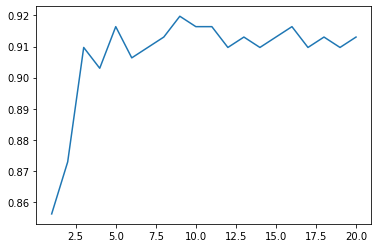

In [ ]:
# plot accuracy for each value of K
accuracy = []
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    knn_predicted = knn.predict(x_test)
    accuracy += [accuracy_score(y_test, knn_predicted)]
plt.plot(range(1,21), accuracy)

For KNN, we'll choose K=7

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
knn_predicted = knn.predict(x_test)

In [ ]:
print('Accuracy: ', accuracy_score(y_test, knn_predicted))
print('Precision: ', precision_score(y_test, knn_predicted, average='macro'))
print('Recall: ', recall_score(y_test, knn_predicted, average='macro'))
print('F1 Score: ', f1_score(y_test, knn_predicted, average='macro'))

Accuracy:  0.9096989966555183
Precision:  0.9085851202079273
Recall:  0.9094067010387675
F1 Score:  0.9085855521133858


Results are just slightly worse with KNN than LinearSVC, about 91% for the F1 score.

**Reminder:**

Class 0 = Defender

Class 1 = Forward

Class 2 = Midfielder

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


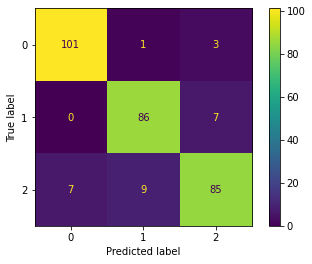

In [ ]:
plot_confusion_matrix(knn, x_test, y_test)

In [ ]:
knn_predicted = pd.Series(knn_predicted, index=y_test.index)

**Reminder:**

Class 0 = Defender

Class 1 = Forward

Class 2 = Midfielder

In [ ]:
# look at who was classified incorrectly
for i in y_test.index:
  if y_test[i] != knn_predicted[i]:
    name = selected_players['Player'][i].split('\\')[0]
    print(f"{name}: Actual={y_test[i]} | Prediction={knn_predicted[i]}" )

Renaud Ripart: Actual=1 | Prediction=2
Alphonso Davies: Actual=0 | Prediction=2
Saúl Ñíguez: Actual=2 | Prediction=0
Moussa Sissoko: Actual=2 | Prediction=0
Santiago Arzamendia: Actual=2 | Prediction=0
Édgar Méndez: Actual=1 | Prediction=2
Raphael Dias Belloli: Actual=1 | Prediction=2
Håvard Nielsen: Actual=2 | Prediction=1
Justin Kluivert: Actual=2 | Prediction=1
Mato Jajalo: Actual=2 | Prediction=0
Maximilian Philipp: Actual=2 | Prediction=1
Joris Chotard: Actual=2 | Prediction=0
Iyenoma Udogie: Actual=0 | Prediction=2
Louis Schaub: Actual=2 | Prediction=1
Ebrima Colley: Actual=1 | Prediction=2
Adri Embarba: Actual=1 | Prediction=2
Kevin Agudelo: Actual=2 | Prediction=1
Marcus Coco: Actual=1 | Prediction=2
Luca Fiordilino: Actual=2 | Prediction=0
Nikolas Nartey: Actual=2 | Prediction=0
Federico Dimarco: Actual=0 | Prediction=2
Antonín Barák: Actual=1 | Prediction=2
Ben Chilwell: Actual=0 | Prediction=1
Mattia Aramu: Actual=2 | Prediction=1
Darwin Machís: Actual=2 | Prediction=1
Migue

# Unsupervised Learning

## K-Means 
using selected features only

In [ ]:
from sklearn.cluster import KMeans

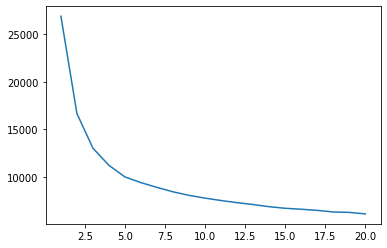

In [ ]:
mse = []
for k in range(1,21):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(select_features)
    mse += [kmeans.inertia_]
plt.plot(range(1,21), mse)

In [ ]:
select_features

,Non-Penalty Expected Goals,Shots,Pressures Att 3rd,Touches Att 3rd,Touches Att Pen,Prog Passes Succ Received,Short Pass Att,Passes Into Final Third,Prog Passes,Pressures Mid 3rd,Touches Mid 3rd,Passes Succ Received,Tackles Def 3rd,Pressures Def 3rd,Blocked Shots,Clearances,Touches Def Pen,Touches Def 3rd
0,-0.737527,-0.693533,-1.293358,-1.599319,-0.658791,-1.118187,0.252774,-0.434982,-0.399226,-1.572714,0.647081,1.974378,2.427881,0.068558,0.458947,1.663179,1.890637,3.197420
1,0.603466,0.323158,-0.263824,0.305255,-0.347450,0.046083,0.426621,-0.314658,0.134655,0.777712,0.288742,-0.298508,0.142124,2.109971,1.236630,0.551384,-0.037638,0.016755
2,-0.741511,-0.373146,-0.718565,1.865364,0.045142,0.010865,3.783857,3.372249,3.764349,-0.616902,2.357524,3.202741,-0.703116,-0.473529,-0.215125,-0.220018,0.038585,0.924975
3,-0.748128,-0.614264,-0.839817,0.132195,-0.617267,-0.682601,2.808499,3.195645,2.363929,-0.921783,2.878432,3.075903,0.310299,-0.214073,1.385405,0.558572,1.003761,1.600263
4,-0.453039,-0.204185,-0.273975,1.227743,0.799551,0.363485,0.956478,-0.064742,0.195109,-0.421715,-0.012956,0.342078,0.507351,0.107576,-0.470282,0.237587,0.094405,0.284200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,0.528304,0.147883,0.432563,0.776450,0.995330,0.891260,0.327373,-0.954707,-1.249703,0.706826,-0.993208,-0.226106,0.192067,0.968448,-0.504303,-0.803465,-0.707912,-0.481234
1490,1.497065,0.327584,1.208882,-0.233176,0.670749,1.033676,-0.938346,-1.094179,-1.249703,0.193423,-1.341483,-1.298134,-1.463177,-1.755394,0.607048,-0.854425,-0.675495,-1.136715
1491,2.092613,1.080779,1.521254,0.769408,1.773777,1.892279,0.194385,-1.156459,-0.858746,0.271387,-0.919247,-0.417963,-1.041558,-1.306745,-0.737956,-1.083267,-0.950121,-1.128398
1492,-0.559249,-0.502266,-0.054893,0.337669,0.385589,1.018090,-0.302618,-1.267167,-1.370173,0.200163,-0.851210,-0.564959,-0.164003,-1.173304,-0.980596,-0.629251,-0.694342,-0.793067


For KMeans, we'll choose K=5

In [ ]:
kmeans = KMeans(n_clusters=5) # FIXME: change k
kmeans.fit(select_features)

KMeans(n_clusters=5)

In [ ]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=select_features.columns)
centroids

,Non-Penalty Expected Goals,Shots,Pressures Att 3rd,Touches Att 3rd,Touches Att Pen,Prog Passes Succ Received,Short Pass Att,Passes Into Final Third,Prog Passes,Pressures Mid 3rd,Touches Mid 3rd,Passes Succ Received,Tackles Def 3rd,Pressures Def 3rd,Blocked Shots,Clearances,Touches Def Pen,Touches Def 3rd
0,1.208618,1.033878,1.159240,0.258058,1.143739,1.071527,-0.793743,-0.930831,-0.948163,0.044850,-1.035534,-0.816197,-0.986220,-1.098369,-0.582636,-0.657160,-0.710690,-0.986781
1,-0.639520,-0.628815,-0.428228,-0.242330,-0.656391,-0.594521,0.077082,0.051461,0.092222,0.341233,0.144153,-0.306551,0.688318,0.850664,0.068666,0.065126,-0.023995,0.137281
2,-0.723918,-0.950541,-1.264872,-1.516991,-0.903779,-1.191443,-0.565979,0.039103,-0.336184,-1.196390,0.116568,0.202234,0.572753,0.335076,1.690714,1.903128,1.976463,1.740522
3,0.382833,0.702803,0.506531,1.153573,0.677337,0.846218,0.332827,-0.108707,0.366837,0.236808,-0.157537,0.290707,-0.461310,-0.351066,-0.678576,-0.730651,-0.678652,-0.663447
4,-0.548305,-0.433021,-0.460186,0.206574,-0.604380,-0.504955,1.585951,1.831629,1.514368,0.245143,1.796375,1.637088,0.303815,0.271284,-0.099174,-0.130927,0.013895,0.450286


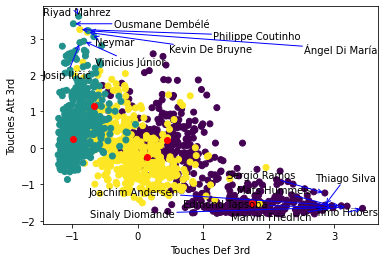

In [ ]:
# look at centroids on the plot of features we viewed earlier to see if they make sense
xstr = 'Touches Def 3rd'
ystr = 'Touches Att 3rd'

plt.scatter(scaled_features[xstr], scaled_features[ystr], c=selected_players.Pos, label=selected_players.Pos)
plt.xlabel(xstr)
plt.ylabel(ystr)
texts = []
x_995p = scaled_features[xstr].quantile(0.995)
y_995p = scaled_features[ystr].quantile(0.995)

for i in selected_players.index:
  name = selected_players['Player'][i].split('\\')[0]
  x = scaled_features[xstr][i]
  y = scaled_features[ystr][i]
  if x > x_995p or y > y_995p:
    texts += [plt.text(x, y, name, ha='center', va='center')]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='blue'))
plt.scatter(centroids[xstr], centroids[ystr], c='red', label=centroids.index)

Now let's combine att, mid, def features - so we have 3 mega-features that let us actually visualize the centroids. 

These mega-features are not used for training, only visualization. The features that make up the mega-features, however, are the ones used for training.

In [ ]:
mega_features = pd.DataFrame()
mega_features['Overall Attacking'] = select_features[att_features].sum(axis=1)
mega_features['Overall Midfield'] = select_features[mid_features].sum(axis=1)
mega_features['Overall Defending'] = select_features[def_features].sum(axis=1)
mega_features

,Overall Attacking,Overall Midfield,Overall Defending
0,-6.100716,0.467311,9.706622
1,0.666688,1.014564,4.019226
2,0.088148,15.863818,-0.648228
3,-3.369882,13.400625,4.644226
4,1.459580,0.994252,0.760837
...,...,...,...
1489,3.771789,-2.389524,-1.336399
1490,4.504781,-5.728422,-5.278159
1491,9.130110,-2.886643,-6.248045
1492,0.624940,-4.155964,-4.434562


In [ ]:
# and get the mega-features for the centroids too
centroids['Overall Attacking'] = centroids[att_features].sum(axis=1)
centroids['Overall Midfield'] = centroids[mid_features].sum(axis=1)
centroids['Overall Defending'] = centroids[def_features].sum(axis=1)
centroids

,Non-Penalty Expected Goals,Shots,Pressures Att 3rd,Touches Att 3rd,Touches Att Pen,Prog Passes Succ Received,Short Pass Att,Passes Into Final Third,Prog Passes,Pressures Mid 3rd,...,Passes Succ Received,Tackles Def 3rd,Pressures Def 3rd,Blocked Shots,Clearances,Touches Def Pen,Touches Def 3rd,Overall Attacking,Overall Midfield,Overall Defending
0,1.208618,1.033878,1.159240,0.258058,1.143739,1.071527,-0.793743,-0.930831,-0.948163,0.044850,...,-0.816197,-0.986220,-1.098369,-0.582636,-0.657160,-0.710690,-0.986781,5.875060,-4.479617,-5.021856
1,-0.639520,-0.628815,-0.428228,-0.242330,-0.656391,-0.594521,0.077082,0.051461,0.092222,0.341233,...,-0.306551,0.688318,0.850664,0.068666,0.065126,-0.023995,0.137281,-3.189805,0.399600,1.786059
2,-0.723918,-0.950541,-1.264872,-1.516991,-0.903779,-1.191443,-0.565979,0.039103,-0.336184,-1.196390,...,0.202234,0.572753,0.335076,1.690714,1.903128,1.976463,1.740522,-6.551545,-1.740647,8.218655
3,0.382833,0.702803,0.506531,1.153573,0.677337,0.846218,0.332827,-0.108707,0.366837,0.236808,...,0.290707,-0.461310,-0.351066,-0.678576,-0.730651,-0.678652,-0.663447,4.269294,0.960935,-3.563701
4,-0.548305,-0.433021,-0.460186,0.206574,-0.604380,-0.504955,1.585951,1.831629,1.514368,0.245143,...,1.637088,0.303815,0.271284,-0.099174,-0.130927,0.013895,0.450286,-2.344273,8.610554,0.809178


In [ ]:
# look at players closest to each centroid
from sklearn.metrics import pairwise_distances_argmin_min
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, select_features)
players_closest_to_centroids = selected_players['Player'][closest]
for p in players_closest_to_centroids:
  print(p.split('\\')[0])

Kike
Simone Bastoni
Harold Moukoudi
Alexis Saelemaekers
Ruben Loftus-Cheek


Check all players' mega-features with the centroids on top to see if selected features are a good representation of all features

150

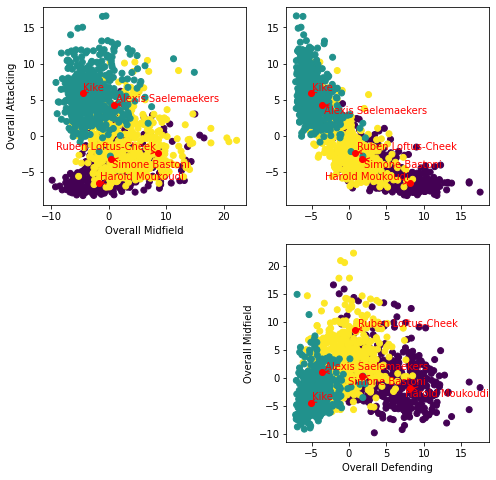

In [ ]:
mid_att_texts = []
def_att_texts = []
def_mid_texts = []

plt.figure(figsize=(8,8))

ax_00 = plt.subplot(2,2,1)
ax_00.scatter(mega_features['Overall Midfield'],mega_features['Overall Attacking'], c=selected_players.Pos, label=selected_players.Pos)
ax_00.scatter(centroids['Overall Midfield'],centroids['Overall Attacking'], c='red')
ax_00.set_xlabel('Overall Midfield')
ax_00.set_ylabel('Overall Attacking')

ax_01 = plt.subplot(2,2,2)
ax_01.scatter(mega_features['Overall Defending'],mega_features['Overall Attacking'], c=selected_players.Pos, label=selected_players.Pos)
ax_01.scatter(centroids['Overall Defending'],centroids['Overall Attacking'], c='red')

ax_11 = plt.subplot(2,2,4)
ax_11.scatter(mega_features['Overall Defending'],mega_features['Overall Midfield'], c=selected_players.Pos, label=selected_players.Pos)
ax_11.scatter(centroids['Overall Defending'],centroids['Overall Midfield'], c='red')
ax_11.set_xlabel('Overall Defending')
ax_11.set_ylabel('Overall Midfield')

for i, name in enumerate(players_closest_to_centroids):
  attack = centroids['Overall Attacking'][i]
  midfield = centroids['Overall Midfield'][i]
  defense = centroids['Overall Defending'][i]
  mid_att_texts += [ax_00.text(midfield, attack, name.split('\\')[0], ha='center', va='center', color='red')]
  def_att_texts += [ax_01.text(defense, attack, name.split('\\')[0], ha='center', va='center', color='red')]
  def_mid_texts += [ax_11.text(defense, midfield, name.split('\\')[0], ha='center', va='center', color='red')]

adjust_text(mid_att_texts, arrowprops=dict(arrowstyle='->', color='red'), ax=ax_00)
adjust_text(def_att_texts, arrowprops=dict(arrowstyle='->', color='red'), ax=ax_01)
adjust_text(def_mid_texts, arrowprops=dict(arrowstyle='->', color='red'), ax=ax_11)




View clusters + centroids

Text(0, 0.5, 'Overall Midfield')

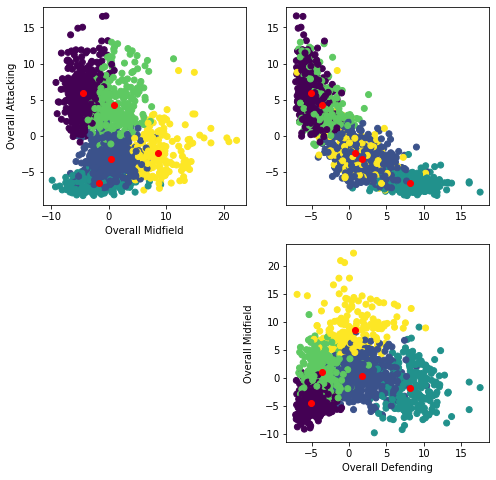

In [ ]:
clusters_assigned = kmeans.predict(select_features)
colors = [c for c in clusters_assigned]

plt.figure(figsize=(8,8))

ax_00 = plt.subplot(2,2,1)
ax_00.scatter(mega_features['Overall Midfield'],mega_features['Overall Attacking'], c=colors)
ax_00.scatter(centroids['Overall Midfield'],centroids['Overall Attacking'], c='red')
ax_00.set_xlabel('Overall Midfield')
ax_00.set_ylabel('Overall Attacking')

ax_01 = plt.subplot(2,2,2)
ax_01.scatter(mega_features['Overall Defending'],mega_features['Overall Attacking'], c=colors)
ax_01.scatter(centroids['Overall Defending'],centroids['Overall Attacking'], c='red')

ax_11 = plt.subplot(2,2,4)
ax_11.scatter(mega_features['Overall Defending'],mega_features['Overall Midfield'], c=colors)
ax_11.scatter(centroids['Overall Defending'],centroids['Overall Midfield'], c='red')
ax_11.set_xlabel('Overall Defending')
ax_11.set_ylabel('Overall Midfield')

In [ ]:
# view some players in each cluster
k = 5
players = [selected_players['Player'][i].split('\\')[0] for i in selected_players['Player'].index]
clustered_players = {'Player': players, 'Cluster': clusters_assigned}
clustered_players = pd.DataFrame.from_dict(clustered_players)
for i in range(k):    
    print(clustered_players[clustered_players['Cluster'] == i])


                 Player  Cluster
2            Jordi Alba        0
3       Benjamin Pavard        0
6        William Saliba        0
10          Niklas Süle        0
13        Vital N'Simba        0
...                 ...      ...
991      Angelo Stiller        0
993   Stanislav Lobotka        0
995          Riqui Puig        0
1200     Sergio Canales        0
1359       Lionel Messi        0

[184 rows x 2 columns]
                     Player  Cluster
4           Alfonso Pedraza        1
20          Pavel Kadeřábek        1
48            Tariq Lamptey        1
72         Patrick Herrmann        1
90            Marcos Alonso        1
...                     ...      ...
1473          Michael Olise        1
1480  Isaac Palazón Camacho        1
1485           Paulo Dybala        1
1488           Elba Rashani        1
1489         Anthony Elanga        1

[277 rows x 2 columns]
               Player  Cluster
0    Marvin Friedrich        2
7        Thiago Silva        2
9              Patr

In [ ]:
cluster_labels = {}
for i in range(k):
  cluster = clustered_players[clustered_players['Cluster'] == i]
  cluster_label = selected_players['Pos'][cluster.index].mode()
  print(cluster_label)
  
# look at most common positions among each cluster 

0    2
dtype: int64
0    1
dtype: int64
0    0
dtype: int64
0    1
dtype: int64
0    2
dtype: int64


Our clusters look to have a good representation of each position - 1 defender cluster, 2 midfielder clusters, 2 forward clusters

## Minisom

In [ ]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=c09b04212516ad773777ee8632a1b9020a01cdf35ad387c227b16bbe26b45bb2
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


In [ ]:
from minisom import MiniSom

In [ ]:
x_train_arr = x_train.to_numpy()
x_test_arr = x_test.to_numpy()
y_train_arr = y_train.to_numpy()
y_test_arr = y_test.to_numpy()

In [ ]:
som_model = MiniSom(5, 5, len(x_train.columns))
som_model.train(x_train_arr, 10000, verbose=True)

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 3.3080050036209596


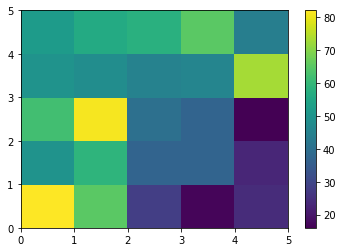

In [ ]:
activation=som_model.activation_response(x_train_arr)
plt.pcolor(activation.T) 
plt.colorbar()
plt.show()

In [ ]:
x_train_qnt = som_model.quantization(x_train_arr)

# Now combine MiniSom with Supervised learning!

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr_model = LogisticRegression(max_iter=1000)
lgr_model.fit(x_train_qnt,y_train_arr)
lgr_model_prediction=lgr_model.predict(som_model.quantization(x_test_arr))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
print('LGC result:')
print('Accuracy: ',accuracy_score(y_test_arr,lgr_model_prediction))
print('f1_score: ', f1_score(y_test_arr,lgr_model_prediction,average='weighted'))
print('Precision: ', precision_score(y_test_arr,lgr_model_prediction,average='weighted'))
print('Recall: ', recall_score(y_test_arr,lgr_model_prediction,average='weighted'))

LGC result:
Accuracy:  0.8695652173913043
f1_score:  0.8695606011295992
Precision:  0.8698295789887862
Recall:  0.8695652173913043


MiniSOM + logistic regression is pretty good! About 87% for the F1 score
but still not as good as LinearSVC.

Scikit-learn's recommendation was right :(

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


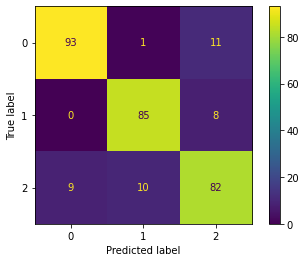

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lgr_model,som_model.quantization(x_test_arr),y_test_arr)

# Conclusion

The best results were achieved by the Linear SVC, with an F1 score of 94%. I believe that this occurred because with algorithms that look at similar players around a given point (whether it's player, centroid, or neuron), such as KNN, Kmeans, and SOM, there are many instances where this information will not be helpful. This is because there is so much variation with this data, and such wide varities of playing styles, even between players in the same position, that this often led to misclassified players. 

When looking at the comparison of players' positions between the 3 "mega-features" (overall defending, overall midfield, overall attacking), we can see that there are some defenders that are more similar to forwards, and that there is a very wide spread of midfielders. 

I believe that this lead to best success with the LinearSVC because that model finds the best way to separate the 3 classes, and any outliers will just be accepted to be classified incorrectly, instead of potentially negatively affecting the classification of surrounding datapoints like in KNN. 

I preferred training with the subset of features I used instead of the original set because a lot of the original features did not reveal much about a player, no matter their position. This meant there was a lot of redundant features that did not help with training. So trimming these down to the subset listed in the Problem Statement meant we can ensure that all features are helpful with training. 



